# CFS

NCEP's Climate Forecast System (version 2) has been operational since 2011.

<https://cfs.ncep.noaa.gov/>

There are three products available

- [`product="time_series"`](#time-series-product)
- [`product="6_hourly"`](#6-hourly-product)
- [`product="monthly"`](#monthly-product)

Some examples below

```python
H = Herbie(
    date,
    model="cfs",
    product="time_series",
    member=1,          # {1, 2, 3, 4}
    variable="tmp2m",  # the file's variable short name.
)
```

```python
H = Herbie(
    date,
    model="cfs",
    product="6_hourly",
    kind="flxf",  # {"flxf", "pgbf", "ocnf", "ipvf"}
    member=1,     # {1, 2, 3, 4}
    fxx=12,       # {0 ... (what's the max forecast hour??}
)
```

```python
H = Herbie(
    date,
    model="cfs",
    product="monthly_means",
    kind="pgbf",  # {"flxf", "pgbf", "ocnh", "ocnf", "ipvf"}
    member=1,     # {1, 2, 3, 4}
    month=1,      # {0 through 9 (I think)}
    hour=None,    # None for daily mean, or {0, 6, 12, 18}
)
```

In [1]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc, ccrs
import matplotlib.pyplot as plt

## Time Series product

For reference of what variables are avaialble: <https://www.nco.ncep.noaa.gov/pmb/products/cfs/#DAILY>

Herbie expects the following arguments for CFS times series product:
- `member`, an integer 1, 2, 3, or 4
- `variable`, a file's variable short name like `tmp2m`, or `z500`, etc.

In [2]:
H = Herbie(
    "2025-01-01",
    model="cfs",
    product="time_series",
    member=1,
    variable="tmp2m",
)

H

/home/blaylock/GITHUB/Herbie/herbie/models/cfs.py:139: UserWarning: Herbie's CFS templates are and subject to major changes. PRs are welcome to improve it.
  warnings.warn(
/home/blaylock/GITHUB/Herbie/herbie/models/cfs.py:178: UserWarning: Variable tmp2m is not in the list of available time series variables. Expected one of {'wnd10m': 'Wind u and v at 10 m', 'wnd1000': 'Wind u and v at 1000 hPa', 'wnd925': 'Wind u and v at 925 hPa', 'wnd850': 'Wind u and v at 850 hPa', 'wnd500': 'Wind u and v at 500 hPa', 'wnd700': 'Wind u and v at 700 hPa', 'wnd250': 'Wind u and v at 250 hPa', 'wnd200': 'Wind u and v at 200 hPa', 'wndstrs': 'Stress at surface', 'prmsl': 'Pressure Reduced to MSL', 'pressfc': 'Surface Pressure', 'z1000': 'GeoPotential Height at 1000 hPa', 'z850': 'GeoPotential Height at 850 hPa', 'z700': 'GeoPotential Height at 700 hPa', 'z500': 'GeoPotential Height at 500 hPa', 'z200': 'GeoPotential Height at 200 hPa', 'tmpsfc': 'Temperature at the Surface', 'tmp2m': 'Temperature at 2

✅ Found ┊ model=cfs ┊ product=time_series ┊ 2025-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


▌▌Herbie CFS model time_series product initialized 2025-Jan-01 00:00 UTC F00 ┊ source=aws

In [3]:
H.SOURCES

{'aws': 'https://noaa-cfs-pds.s3.amazonaws.com/cfs.20250101/00/time_grib_01/tmp2m.01.2025010100.daily.grb2',
 'nomads': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/cfs/prod/cfs.20250101/00/time_grib_01/tmp2m.01.2025010100.daily.grb2'}

In [4]:
# What are the available time series variables values?
# You may import the dictionary of values or refer to
# https://www.nco.ncep.noaa.gov/pmb/products/cfs/

from herbie.models.cfs import time_series_variables

time_series_variables

{'wnd10m': 'Wind u and v at 10 m',
 'wnd1000': 'Wind u and v at 1000 hPa',
 'wnd925': 'Wind u and v at 925 hPa',
 'wnd850': 'Wind u and v at 850 hPa',
 'wnd500': 'Wind u and v at 500 hPa',
 'wnd700': 'Wind u and v at 700 hPa',
 'wnd250': 'Wind u and v at 250 hPa',
 'wnd200': 'Wind u and v at 200 hPa',
 'wndstrs': 'Stress at surface',
 'prmsl': 'Pressure Reduced to MSL',
 'pressfc': 'Surface Pressure',
 'z1000': 'GeoPotential Height at 1000 hPa',
 'z850': 'GeoPotential Height at 850 hPa',
 'z700': 'GeoPotential Height at 700 hPa',
 'z500': 'GeoPotential Height at 500 hPa',
 'z200': 'GeoPotential Height at 200 hPa',
 'tmpsfc': 'Temperature at the Surface',
 'tmp2m': 'Temperature at 2 m',
 'tmin': 'Minimum Temperature at 2 m',
 'tmax': 'Maximum Temperature at 2 m',
 't1000': 'Temperature at 1000 hPa',
 't850': 'Temperature at 850 hPa',
 't700': 'Temperature at 700 hPa',
 't500': 'Temperature at 500 hPa',
 't250': 'Temperature at 250 hPa',
 't200': 'Temperature at 200 hPa',
 't50': 'Temper

In [5]:
H = Herbie(
    "2025-01-01",
    model="cfs",
    product="time_series",
    member=1,
    variable="wnd10m",
)

H.inventory()

/home/blaylock/GITHUB/Herbie/herbie/models/cfs.py:178: UserWarning: Variable wnd10m is not in the list of available time series variables. Expected one of {'wnd10m': 'Wind u and v at 10 m', 'wnd1000': 'Wind u and v at 1000 hPa', 'wnd925': 'Wind u and v at 925 hPa', 'wnd850': 'Wind u and v at 850 hPa', 'wnd500': 'Wind u and v at 500 hPa', 'wnd700': 'Wind u and v at 700 hPa', 'wnd250': 'Wind u and v at 250 hPa', 'wnd200': 'Wind u and v at 200 hPa', 'wndstrs': 'Stress at surface', 'prmsl': 'Pressure Reduced to MSL', 'pressfc': 'Surface Pressure', 'z1000': 'GeoPotential Height at 1000 hPa', 'z850': 'GeoPotential Height at 850 hPa', 'z700': 'GeoPotential Height at 700 hPa', 'z500': 'GeoPotential Height at 500 hPa', 'z200': 'GeoPotential Height at 200 hPa', 'tmpsfc': 'Temperature at the Surface', 'tmp2m': 'Temperature at 2 m', 'tmin': 'Minimum Temperature at 2 m', 'tmax': 'Maximum Temperature at 2 m', 't1000': 'Temperature at 1000 hPa', 't850': 'Temperature at 850 hPa', 't700': 'Temperature 

✅ Found ┊ model=cfs ┊ product=time_series ┊ 2025-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,0,59189.0,0-59189,2025-01-01,2025-01-01,UGRD,10 m above ground,6 hour fcst,:UGRD:10 m above ground:6 hour fcst
1,2,59190,118009.0,59190-118009,2025-01-01,2025-01-01,UGRD,10 m above ground,12 hour fcst,:UGRD:10 m above ground:12 hour fcst
2,3,118010,176851.0,118010-176851,2025-01-01,2025-01-01,UGRD,10 m above ground,18 hour fcst,:UGRD:10 m above ground:18 hour fcst
3,4,176852,235807.0,176852-235807,2025-01-01,2025-01-01,UGRD,10 m above ground,24 hour fcst,:UGRD:10 m above ground:24 hour fcst
4,5,235808,295010.0,235808-295010,2025-01-01,2025-01-01,VGRD,10 m above ground,6 hour fcst,:VGRD:10 m above ground:6 hour fcst
...,...,...,...,...,...,...,...,...,...,...
2427,2428,144814943,144875086.0,144814943-144875086,2025-01-01,2025-01-01,VGRD,10 m above ground,7272 hour fcst,:VGRD:10 m above ground:7272 hour fcst
2428,2429,144875087,144934966.0,144875087-144934966,2025-01-01,2025-01-01,VGRD,10 m above ground,7278 hour fcst,:VGRD:10 m above ground:7278 hour fcst
2429,2430,144934967,144994972.0,144934967-144994972,2025-01-01,2025-01-01,VGRD,10 m above ground,7284 hour fcst,:VGRD:10 m above ground:7284 hour fcst
2430,2431,144994973,145054851.0,144994973-145054851,2025-01-01,2025-01-01,VGRD,10 m above ground,7290 hour fcst,:VGRD:10 m above ground:7290 hour fcst


In [6]:
# Only get 6 hour forecast
H.inventory("[U,V]GRD:10 m.*:6 hour")


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,0,59189.0,0-59189,2025-01-01,2025-01-01,UGRD,10 m above ground,6 hour fcst,:UGRD:10 m above ground:6 hour fcst
4,5,235808,295010.0,235808-295010,2025-01-01,2025-01-01,VGRD,10 m above ground,6 hour fcst,:VGRD:10 m above ground:6 hour fcst


In [7]:
ds = H.xarray("[U,V]GRD:10 m.*:6 hour")

# Calculate wind speed
ds["wind_speed"] = (ds.u10**2 + ds.v10**2) ** 0.5
ds

<xarray.Dataset> Size: 880kB
Dimensions:              (latitude: 190, longitude: 384)
Coordinates:
    time                 datetime64[ns] 8B 2025-01-01
    step                 timedelta64[ns] 8B 06:00:00
    heightAboveGround    float64 8B 10.0
  * latitude             (latitude) float64 2kB 89.28 88.34 ... -88.34 -89.28
  * longitude            (longitude) float64 3kB 0.0 0.9375 ... 358.1 359.1
    valid_time           datetime64[ns] 8B 2025-01-01T06:00:00
    gribfile_projection  object 8B None
Data variables:
    u10                  (latitude, longitude) float32 292kB 2.62 2.5 ... -3.2
    v10                  (latitude, longitude) float32 292kB -7.05 ... 1.77
    wind_speed           (latitude, longitude) float32 292kB 7.521 ... 3.657
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   cfs
    product:                 time_series
    description:             Climate Forecast System
    remote_grib:             https://noaa-cfs-pds.s3.amazonaws.com/cfs.202501...
    local_grib:              /home/blaylock/data/cfs/20250101/subset_6aef9f3c...
    search:                  [U,V]GRD:10 m.*:6 hour

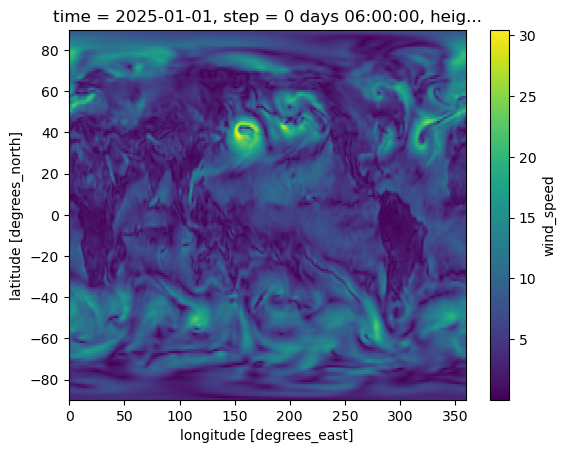

In [8]:
ds["wind_speed"].plot()

## 6 Hourly Product

Herbie expects the following additional arguments for CFS 6-hourly product:
- `kind`, which is flxf, pgbf, ocnf, or ipvf
- `member`, an integer 1, 2, 3, or 4
- `fxx`, integer forecast lead time, in hours

In [9]:
# What are the available product kind values?
# You may import the dictionary of values or refer to
# https://www.nco.ncep.noaa.gov/pmb/products/cfs/

from herbie.models.cfs import product_kind

product_kind


{'flxf': 'CFS Surface, Radiative Fluxes',
 'pgbf': 'CFS 3D Pressure Level, 1 degree resolution',
 'ocnh': 'CFS 3D Ocean Data, 0.5 degree resolution',
 'ocnf': 'CFS 3D Ocean Data, 1.0 degree resolution',
 'ipvf': 'CFS 3D Isentropic Level, 1.0 degree resolution'}

In [10]:
H = Herbie(
    "2024-12-25",
    model="cfs",
    product="6_hourly",
    kind="flxf",
    member=1,
    fxx=12,
)

# Show the grib file and index file location
H.grib, H.idx

/home/blaylock/GITHUB/Herbie/herbie/models/cfs.py:139: UserWarning: Herbie's CFS templates are and subject to major changes. PRs are welcome to improve it.
  warnings.warn(


✅ Found ┊ model=cfs ┊ product=6_hourly ┊ 2024-Dec-25 00:00 UTC F12 ┊ GRIB2 @ aws ┊ IDX @ aws


('https://noaa-cfs-pds.s3.amazonaws.com/cfs.20241225/00/6hrly_grib_01/flxf2024122512.01.2024122500.grb2',
 'https://noaa-cfs-pds.s3.amazonaws.com/cfs.20241225/00/6hrly_grib_01/flxf2024122512.01.2024122500.grb2.idx')

In [11]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1.0,0,46418.0,0-46418,2024-12-25,2024-12-25 12:00:00,UFLX,surface,12 hour fcst,:UFLX:surface:12 hour fcst
1,2.0,46419,92097.0,46419-92097,2024-12-25,2024-12-25 12:00:00,VFLX,surface,12 hour fcst,:VFLX:surface:12 hour fcst
2,3.0,92098,129279.0,92098-129279,2024-12-25,2024-12-25 12:00:00,SHTFL,surface,12 hour fcst,:SHTFL:surface:12 hour fcst
3,4.0,129280,169431.0,129280-169431,2024-12-25,2024-12-25 12:00:00,LHTFL,surface,12 hour fcst,:LHTFL:surface:12 hour fcst
4,5.0,169432,252904.0,169432-252904,2024-12-25,2024-12-25 12:00:00,TMP,surface,12 hour fcst,:TMP:surface:12 hour fcst
...,...,...,...,...,...,...,...,...,...,...
98,97.0,3939672,3965411.0,3939672-3965411,2024-12-25,2024-12-25 12:00:00,VBDSF,surface,12 hour fcst,:VBDSF:surface:12 hour fcst
99,98.0,3965412,3990233.0,3965412-3990233,2024-12-25,2024-12-25 12:00:00,VDDSF,surface,12 hour fcst,:VDDSF:surface:12 hour fcst
100,99.0,3990234,4020806.0,3990234-4020806,2024-12-25,2024-12-25 12:00:00,NBDSF,surface,12 hour fcst,:NBDSF:surface:12 hour fcst
101,100.0,4020807,4048869.0,4020807-4048869,2024-12-25,2024-12-25 12:00:00,NDDSF,surface,12 hour fcst,:NDDSF:surface:12 hour fcst


In [12]:
H.inventory("TMP:2 m above")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
37,37.0,1863350,1941530.0,1863350-1941530,2024-12-25,2024-12-25 12:00:00,TMP,2 m above ground,12 hour fcst,:TMP:2 m above ground:12 hour fcst


In [13]:
ds = H.xarray("TMP:2 m above")

ax = EasyMap(crs=ds.herbie.crs).ax
art = ax.pcolormesh(ds.longitude, ds.latitude, ds.t2m, transform=pc)

plt.colorbar(
    art,
    ax=ax,
    shrink=0.5,
    pad=0.01,
    orientation="horizontal",
    label="Mean 2-m Temperature (K)",
)

ax.set_title(f"Initialized:{H.date:%Y-%m-%d}\nMember:{H.member} Forecast Hour:{H.fxx}")

ValueError: Unhandled projection: unknown

## Monthly Product

Herbie expects the following additional arguments for CFS Monthly product:
- `kind`, which is flxf, pgbf, ocnh, ocnf, or ipvf
- `member`, an integer 1, 2, 3, or 4
- `month`, an integer representing the month forecast (1 through 9)
- `hour`, None for daily mean, or 0, 6, 12, or 18

In [21]:
H = Herbie(
    "2024-05-25",
    model="cfs",
    product="monthly_means",
    kind="pgbf",
    member=1,
    month=1,
    hour=None,  # daily mean
)

/home/blaylock/GITHUB/Herbie/herbie/models/cfs.py:139: UserWarning: Herbie's CFS templates are and subject to major changes. PRs are welcome to improve it.
  warnings.warn(


✅ Found ┊ model=cfs ┊ product=monthly_means ┊ 2024-May-25 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [22]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1.0,0,59628.0,0-59628,2024-05-25,2024-05-25,PRES,mean sea level,1-2 month ave fcst,:PRES:mean sea level:1-2 month ave fcst
1,2.0,59629,81460.0,59629-81460,2024-05-25,2024-05-25,HGT,1 mb,1-2 month ave fcst,:HGT:1 mb:1-2 month ave fcst
2,3.0,81461,100657.0,81461-100657,2024-05-25,2024-05-25,TMP,1 mb,1-2 month ave fcst,:TMP:1 mb:1-2 month ave fcst
3,4.0,100658,104304.0,100658-104304,2024-05-25,2024-05-25,RH,1 mb,1-2 month ave fcst,:RH:1 mb:1-2 month ave fcst
4,5.0,104305,131107.0,104305-131107,2024-05-25,2024-05-25,SPFH,1 mb,1-2 month ave fcst,:SPFH:1 mb:1-2 month ave fcst
...,...,...,...,...,...,...,...,...,...,...
519,473.0,23632602,23656841.0,23632602-23656841,2024-05-25,2024-05-25,VPOT,3 mb,1-2 month ave fcst,:VPOT:3 mb:1-2 month ave fcst
520,474.0,23656842,23674971.0,23656842-23674971,2024-05-25,2024-05-25,STRM,2 mb,1-2 month ave fcst,:STRM:2 mb:1-2 month ave fcst
521,475.0,23674972,23699670.0,23674972-23699670,2024-05-25,2024-05-25,VPOT,2 mb,1-2 month ave fcst,:VPOT:2 mb:1-2 month ave fcst
522,476.0,23699671,23717971.0,23699671-23717971,2024-05-25,2024-05-25,STRM,1 mb,1-2 month ave fcst,:STRM:1 mb:1-2 month ave fcst


In [23]:
H.inventory("TMP:500")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
207,187.0,8023672,8050166.0,8023672-8050166,2024-05-25,2024-05-25,TMP,500 mb,1-2 month ave fcst,:TMP:500 mb:1-2 month ave fcst


In [24]:
ds = H.xarray("TMP:500 mb")
ds

<xarray.Dataset> Size: 265kB
Dimensions:              (latitude: 181, longitude: 360)
Coordinates:
    time                 datetime64[ns] 8B 2024-05-25
    step                 timedelta64[ns] 8B 60 days
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 1kB 90.0 89.0 88.0 ... -89.0 -90.0
  * longitude            (longitude) float64 3kB 0.0 1.0 2.0 ... 358.0 359.0
    valid_time           datetime64[ns] 8B 2024-07-24
    gribfile_projection  object 8B None
Data variables:
    avg_t                (latitude, longitude) float32 261kB 248.5 ... 228.8
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   cfs
    product:                 monthly_means
    description:             Climate Forecast System
    remote_grib:             https://noaa-cfs-pds.s3.amazonaws.com/cfs.202405...
    local_grib:              /home/blaylock/data/cfs/20240525/subset_07ef4109...
    search:                  TMP:500 mb

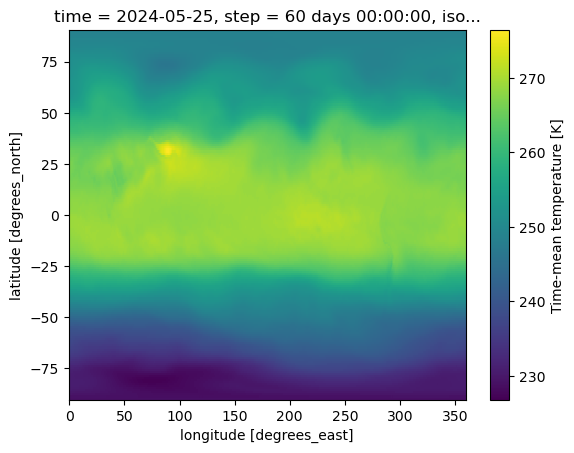

In [25]:
ds.avg_t.plot()


In [26]:
ax = EasyMap(crs=ds.herbie.crs).ax
art = ax.pcolormesh(ds.longitude, ds.latitude, ds.t, transform=pc)

plt.colorbar(
    art,
    ax=ax,
    shrink=0.5,
    pad=0.01,
    orientation="horizontal",
    label="Mean 2-m Temperature (K)",
)

ax.set_title(
    f"Initialized:{H.date:%Y-%m-%d}\nMember:{H.member}; Month Forecast:{H.month}; Hour:{H.hour}"
)

ValueError: Unhandled projection: unknown

### Monthly means by hour (0, 6, 12, or 18)

In [27]:
H = Herbie(
    "2024-05-25",
    model="cfs",
    product="monthly_means",
    kind="pgbf",
    member=1,
    month=2,
    hour=6,  # 2-3 month forecast average for 06z
)
print(H.grib)
H.inventory()

/home/blaylock/GITHUB/Herbie/herbie/models/cfs.py:139: UserWarning: Herbie's CFS templates are and subject to major changes. PRs are welcome to improve it.
  warnings.warn(


✅ Found ┊ model=cfs ┊ product=monthly_means ┊ 2024-May-25 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
https://noaa-cfs-pds.s3.amazonaws.com/cfs.20240525/00/monthly_grib_01/pgbf.01.2024052500.202407.avrg.grib.06Z.grb2


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1.0,0,61046.0,0-61046,2024-05-25,2024-05-25,PRES,mean sea level,2-3 month ave fcst,:PRES:mean sea level:2-3 month ave fcst
1,2.0,61047,85673.0,61047-85673,2024-05-25,2024-05-25,HGT,1 mb,2-3 month ave fcst,:HGT:1 mb:2-3 month ave fcst
2,3.0,85674,110975.0,85674-110975,2024-05-25,2024-05-25,TMP,1 mb,2-3 month ave fcst,:TMP:1 mb:2-3 month ave fcst
3,4.0,110976,115617.0,110976-115617,2024-05-25,2024-05-25,RH,1 mb,2-3 month ave fcst,:RH:1 mb:2-3 month ave fcst
4,5.0,115618,148871.0,115618-148871,2024-05-25,2024-05-25,SPFH,1 mb,2-3 month ave fcst,:SPFH:1 mb:2-3 month ave fcst
...,...,...,...,...,...,...,...,...,...,...
519,473.0,25462570,25496004.0,25462570-25496004,2024-05-25,2024-05-25,VPOT,3 mb,2-3 month ave fcst,:VPOT:3 mb:2-3 month ave fcst
520,474.0,25496005,25515605.0,25496005-25515605,2024-05-25,2024-05-25,STRM,2 mb,2-3 month ave fcst,:STRM:2 mb:2-3 month ave fcst
521,475.0,25515606,25549621.0,25515606-25549621,2024-05-25,2024-05-25,VPOT,2 mb,2-3 month ave fcst,:VPOT:2 mb:2-3 month ave fcst
522,476.0,25549622,25566670.0,25549622-25566670,2024-05-25,2024-05-25,STRM,1 mb,2-3 month ave fcst,:STRM:1 mb:2-3 month ave fcst
